In [1]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets 
from torchvision import transforms
from torchvision.utils import save_image
from torch.autograd import Variable


import pandas as pd 
import numpy as np
import os 
import glob
np.random.seed(1337)  # for reproducibility
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import torch.optim as optim
import torch
import torch.nn.functional as nn
import torch.autograd as autograd
import torch.optim as optim
import numpy as np
#import matplotlib.pyplot as plt
#import matplotlib.gridspec as gridspec
import os
from torch.autograd import Variable
from sklearn.utils import shuffle
import random
from keras.datasets import mnist
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from keras import optimizers
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [2]:
train_lre_10sec = pd.read_csv('/home/satishk/GAN_lre/gan_csv/GAN_3sec_ivectors_X_train_23Jan_labels_ids_combined_extraction.csv')
#train_afds

In [3]:
train_lre_10sec.head()

,0,1,2,3,4,5,6,7,8,9,...,495,496,497,498,499,ids,year,data,lang,lang_id
0,-0.288856,1.077276,-0.997014,-1.551668,1.872073,2.065912,0.372257,0.572046,0.193405,1.757147,...,-0.438400,-1.656095,-2.260519,-2.310296,-0.116104,zkllk,LDC2017E22,data,eng-usg,zkllk
1,-0.817944,0.533774,-0.220520,-1.179676,1.978820,1.625874,2.724428,0.002258,0.602494,0.557696,...,-0.072783,0.355132,-0.455919,0.457748,0.441314,zkllk,LDC2017E22,data,eng-usg,zkllk
2,-0.254045,0.516111,-2.342719,-0.168260,2.135270,1.840081,1.099695,-0.824896,1.183893,1.348687,...,-0.369343,1.227145,0.261007,-1.896720,-1.880805,zkllk,LDC2017E22,data,eng-usg,zkllk
3,0.312335,1.028501,0.949289,-0.038601,-0.316138,2.581506,-0.385537,0.003561,0.208976,1.881144,...,-0.189522,4.442143,-1.973735,-0.300837,-1.459117,lid05e1_lid00562,LDC2017E22,data,eng-usg,lid05e1_lid00562
4,0.427070,-0.041225,-0.120159,-1.673124,0.709581,0.949306,-0.719441,-0.731202,-0.413784,0.505109,...,2.190149,2.663788,0.177806,0.539857,-2.358348,lid05e1_lid00562,LDC2017E22,data,eng-usg,lid05e1_lid00562


In [4]:
X_train_10sec = train_lre_10sec.drop(['ids','year','data','lang','lang_id'],axis=1)

In [5]:
#train_lre = train_lre.iloc[1000:2000]

In [6]:
train_lre_30sec = pd.read_csv('/home/satishk/GAN_lre/gan_csv/GAN_10sec_ivectors_X_train_23Jan_labels_ids_combined_extraction.csv')


In [7]:
train_lre_30sec.head()

,0,1,2,3,4,5,6,7,8,9,...,495,496,497,498,499,ids,year,data,lang,lang_id
0,-0.314181,0.671920,-0.188068,-0.910752,1.050361,1.966829,0.292740,1.084547,1.287480,1.745248,...,-0.564911,-1.854116,-3.185948,-2.177057,0.301166,zkllk,LDC2017E22,data,eng-usg,zkllk
1,-0.640179,0.301083,0.071469,-0.550717,1.258704,1.560921,0.588061,0.849878,1.693304,1.515224,...,-0.109180,0.066603,-2.434538,-0.728701,1.941986,zkllk,LDC2017E22,data,eng-usg,zkllk
2,-0.696718,-0.011839,-1.394296,-0.432752,1.630261,1.919297,0.930681,0.652783,1.899361,0.722699,...,-2.320411,-0.358037,-2.294246,-1.532981,-0.590578,zkllk,LDC2017E22,data,eng-usg,zkllk
3,0.503734,0.247072,0.451463,0.500546,-0.716668,1.337575,-1.027019,0.773720,0.910362,1.728001,...,0.886613,6.766799,-1.040380,-0.751316,-1.487938,lid05e1_lid00562,LDC2017E22,data,eng-usg,lid05e1_lid00562
4,-0.088514,0.886515,0.095606,-0.870576,1.269740,1.076300,-0.073294,-0.330384,-0.789608,0.358869,...,1.725191,1.086392,0.900200,1.200539,-2.001619,lid05e1_lid00562,LDC2017E22,data,eng-usg,lid05e1_lid00562


In [8]:
X_train_30sec = train_lre_30sec.drop(['ids','year','data','lang','lang_id'],axis=1)

In [9]:
y_30sec_labels = train_lre_30sec["lang"]

In [10]:
y_30sec_labels.head()

0    eng-usg
1    eng-usg
2    eng-usg
3    eng-usg
4    eng-usg
Name: lang, dtype: object

In [11]:
le = preprocessing.LabelEncoder()
le.fit(y_30sec_labels)

LabelEncoder()

In [12]:
le.classes_

array(['ara-acm', 'ara-apc', 'ara-ary', 'ara-arz', 'eng-gbr', 'eng-usg',
       'por-brz', 'qsl-pol', 'qsl-rus', 'spa-car', 'spa-eur', 'spa-lac',
       'zho-cmn', 'zho-nan'], dtype=object)

In [13]:
y_30sec_labels=le.transform(y_30sec_labels)

In [14]:
y_30sec_labels.shape

(360133,)

In [15]:
nb_classes = 14
# convert class vectors to binary class matrices
Y_train_labels = np_utils.to_categorical(y_30sec_labels, nb_classes)

In [16]:
Y_train_labels.shape

(360133, 14)

In [17]:
X_train_10sec = X_train_10sec.values
X_train_30sec = X_train_30sec.values

In [18]:
X_train_10sec = X_train_10sec.astype('float32')
#X_test = X_test.astype('float32')
X_train_30sec = X_train_30sec.astype('float32')

#X_train /= 255
#X_test /= 255
#X_val /= 255

print('X_train_10sec shape:', X_train_10sec.shape)
print(X_train_10sec.shape[0], 'train 10sec')
#print(X_test.shape[0], 'test samples')
print(X_train_30sec.shape[0], ' train 30sec')


X_train_10sec shape: (360133, 500)
360133 train 10sec
360133  train 30sec


In [19]:
#Shuffle the Dataset
X_train_10sec_F, X_test_10sec_F,  X_train_30sec_F, X_test_30sec_F = train_test_split(X_train_10sec, X_train_30sec, test_size=0.20, random_state=42)

In [20]:
Y_train_labels, Y_test_labels = train_test_split(Y_train_labels, test_size=0.20, random_state=42)

In [21]:
y_30sec_labels_train, y_30sec_labels_test = train_test_split(y_30sec_labels, test_size=0.20, random_state=42 )

In [22]:
X_test_10sec_F.shape

(72027, 500)

In [23]:
X_train_10sec_F.shape

(288106, 500)

In [24]:
import torch.nn as nn

In [25]:
class FC_Network(torch.nn.Module):

    def __init__(self,):
        super(FC_Network, self).__init__()

        D_in = D_out = 500        # param['patch_length'] * param['n_channels'] * (param['n_fft'] / 2 + 1)
        num_nodes_fnn = 512
        self.layer_1 = torch.nn.Linear(D_in, num_nodes_fnn)
        self.bn_1 = torch.nn.BatchNorm1d(num_nodes_fnn)
        self.layer_2 = torch.nn.Linear(num_nodes_fnn, num_nodes_fnn)
        self.bn_2 = torch.nn.BatchNorm1d(num_nodes_fnn)
        self.layer_3 = torch.nn.Linear(num_nodes_fnn, num_nodes_fnn)
        self.bn_3 = torch.nn.BatchNorm1d(num_nodes_fnn)
        self.layer_4 = torch.nn.Linear(num_nodes_fnn,num_nodes_fnn)
        self.bn_4 = torch.nn.BatchNorm1d(num_nodes_fnn)
        self.output_layer = torch.nn.Linear(num_nodes_fnn, D_out)
        self.relu = torch.nn.ReLU()
        self.tanh = torch.nn.Tanh()

    def forward(self, x):
        out = x
        #out = x.view(x.size(0), -1)
        out = self.bn_1(self.relu(self.layer_1(out)))
        out = self.bn_2(self.relu(self.layer_2(out)))
        out = self.bn_3(self.relu(self.layer_3(out)))
        out = self.bn_4(self.relu(self.layer_4(out)))
        out = (self.output_layer(out))

        #out = (self.relu(self.layer_1(out)))
        #out = (self.relu(self.layer_2(out)))
        #out = (self.relu(self.layer_3(out)))
        #out = (self.relu(self.layer_4(out)))
        #out = (self.output_layer(out))
        #out = out.view(x.size())
        return out

In [26]:
S_encoder = FC_Network()

In [27]:
S_encoder.cuda()

FC_Network(
  (layer_1): Linear(in_features=500, out_features=512)
  (bn_1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True)
  (layer_2): Linear(in_features=512, out_features=512)
  (bn_2): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True)
  (layer_3): Linear(in_features=512, out_features=512)
  (bn_3): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True)
  (layer_4): Linear(in_features=512, out_features=512)
  (bn_4): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True)
  (output_layer): Linear(in_features=512, out_features=500)
  (relu): ReLU()
  (tanh): Tanh()
)

In [28]:
#To calculate the no of parameters in a model
model_parameters = filter(lambda p: p.requires_grad, S_encoder.parameters())
no_params = sum([np.prod(p.size()) for p in model_parameters])

In [29]:
no_params

1305076

In [30]:
learning_rate = 0.0002
betas = (0.5, 0.999)

In [31]:
# Loss function
criterion = torch.nn.MSELoss()

# Optimizers
S_solver = torch.optim.Adam(S_encoder.parameters(), lr=learning_rate, 
                            betas=betas, weight_decay=1e-5)
#T_solver = torch.optim.Adam(T_encoder.parameters(), lr=learning_rate/2, betas=betas)

In [32]:
len(X_train_10sec)

360133

In [33]:
len(X_train_30sec)

360133

In [34]:
mb_size = 256
batch_size = mb_size

In [35]:
train_epoch = []
train_loss_epoch = []
test_loss_epoch = []
mb_size = 256
batch_size = mb_size
# Start training
for epoch in range(100):
    
    

    print('epoch:',epoch)
    # Build mini-batch dataset
    

    it=0
    while it+batch_size < len(X_train_10sec_F) :
        

        start= it
        end= it + batch_size


        #z = Variable(torch.randn(mb_size, Z_dim))
        X = X_train_10sec_F[start:end]
        r = np.random.randint(X_test_30sec_F.shape[0], size=256)
        X_test = X_test_10sec_F[r, :]
        #X_test = X_test_10sec_F[0:255]

        c = X_train_30sec_F[start:end]
        c_test = X_test_30sec_F[r, :]
        #c_test = X_test_30sec_F[0:255]
        
        X = Variable(torch.from_numpy(X))
        c = Variable(torch.from_numpy(c.astype('float32')))
        
        X_test = Variable(torch.from_numpy(X_test))
        c_test = Variable(torch.from_numpy(c_test.astype('float32')))
        
        X = X.cuda()
        X_test = X_test.cuda()
        c = c.cuda()
        c_test = c_test.cuda()
        
        
        S_encoder.train()
        S_sample = S_encoder(X)
        
        S_loss_train = criterion(S_sample, c)
        
        S_loss_train.backward()
        S_solver.step()
        
        S_solver.zero_grad()
        
        S_encoder.eval()
        S_sample_test = S_encoder(X_test)

        S_loss_test = criterion(S_sample_test, c_test)
        S_solver.zero_grad()
        


        it+= batch_size
    train_loss_epoch.append(S_loss_train.cpu().data.numpy())
    test_loss_epoch.append(S_loss_test.cpu().data.numpy())
    train_epoch.append(epoch)
    print('S_loss_train: {}'.format(S_loss_train.cpu().data.numpy()), 
          'S_loss_test: {}'.format(S_loss_test.cpu().data.numpy()))
           

epoch: 0
S_loss_train: [ 1.7227124] S_loss_test: [ 1.72774708]
epoch: 1
S_loss_train: [ 1.59598982] S_loss_test: [ 1.59491479]
epoch: 2
S_loss_train: [ 1.55096197] S_loss_test: [ 1.55936074]
epoch: 3
S_loss_train: [ 1.52735281] S_loss_test: [ 1.53965795]
epoch: 4
S_loss_train: [ 1.51414561] S_loss_test: [ 1.54143751]
epoch: 5
S_loss_train: [ 1.50328708] S_loss_test: [ 1.51707876]
epoch: 6
S_loss_train: [ 1.49571264] S_loss_test: [ 1.51917362]
epoch: 7
S_loss_train: [ 1.49006915] S_loss_test: [ 1.4904865]
epoch: 8
S_loss_train: [ 1.48488164] S_loss_test: [ 1.5030427]
epoch: 9
S_loss_train: [ 1.47981346] S_loss_test: [ 1.49744534]
epoch: 10
S_loss_train: [ 1.47607636] S_loss_test: [ 1.4902904]
epoch: 11
S_loss_train: [ 1.47271621] S_loss_test: [ 1.48733008]
epoch: 12
S_loss_train: [ 1.46997929] S_loss_test: [ 1.4631207]
epoch: 13
S_loss_train: [ 1.46695375] S_loss_test: [ 1.45889318]
epoch: 14
S_loss_train: [ 1.46398926] S_loss_test: [ 1.47772145]
epoch: 15
S_loss_train: [ 1.46214366] S_

In [36]:
#train_loss_epoch

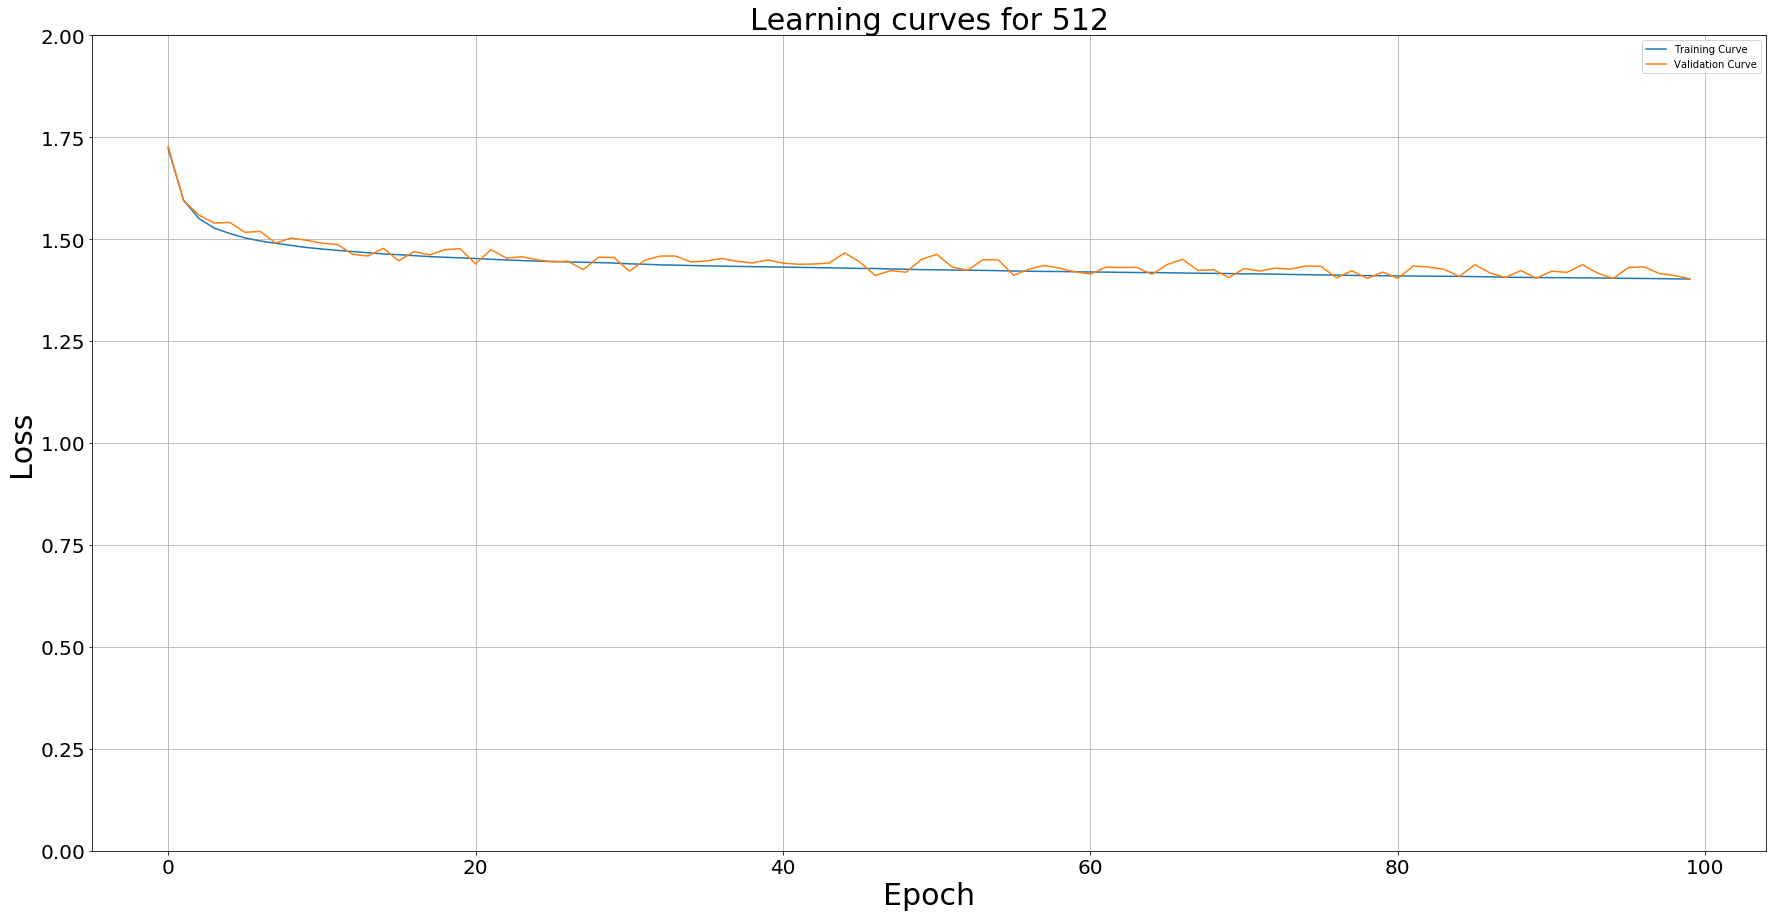

In [37]:
plt.figure(figsize=(30,15))
plt.title('Learning curves for 512', fontsize=30)
plt.xlabel('Epoch', fontsize=30)
plt.ylabel('Loss', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(0, 2)

plt.plot(train_loss_epoch,label='Training Curve')
plt.plot(test_loss_epoch,label='Validation Curve')

plt.legend()
plt.grid()
plt.show()

In [38]:
X_train_30sec_gen = Variable(torch.from_numpy(X_train_10sec_F))

In [39]:
S_encoder.eval()

FC_Network(
  (layer_1): Linear(in_features=500, out_features=512)
  (bn_1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True)
  (layer_2): Linear(in_features=512, out_features=512)
  (bn_2): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True)
  (layer_3): Linear(in_features=512, out_features=512)
  (bn_3): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True)
  (layer_4): Linear(in_features=512, out_features=512)
  (bn_4): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True)
  (output_layer): Linear(in_features=512, out_features=500)
  (relu): ReLU()
  (tanh): Tanh()
)

In [40]:
S_encoder.cpu()

FC_Network(
  (layer_1): Linear(in_features=500, out_features=512)
  (bn_1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True)
  (layer_2): Linear(in_features=512, out_features=512)
  (bn_2): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True)
  (layer_3): Linear(in_features=512, out_features=512)
  (bn_3): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True)
  (layer_4): Linear(in_features=512, out_features=512)
  (bn_4): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True)
  (output_layer): Linear(in_features=512, out_features=500)
  (relu): ReLU()
  (tanh): Tanh()
)

In [41]:
gen_samples = S_encoder(X_train_30sec_gen)

In [42]:
gen_samples.data.shape

torch.Size([288106, 500])

In [43]:
#Taking the generated iVectors we will try to check the acc by MLP

In [44]:
train_X_gen = gen_samples.cpu().data.numpy()

In [45]:
type(train_X_gen)

numpy.ndarray

In [46]:

X_train = pd.DataFrame(X_train_10sec)
#Y_train = pd.DataFrame(Y_train)


In [47]:
val_lre = pd.read_csv('/home/satishk/GAN_lre/gan_csv/odyssey_ivectors_21Feb/dev_feat_BNF_h5_21Feb_3sec.csv')


In [49]:
val_lre.head()

,0,1,2,3,4,5,6,7,8,9,...,495,496,497,498,499,uttid,language_code,data_source,speech_duration,segmentid1
0,1.495156,0.500314,1.291860,1.783091,-1.753508,1.749764,1.385981,-0.047419,2.330136,1.218196,...,-0.767921,1.285281,-0.787158,-0.668345,-1.590191,lre17_fvniwqea,qsl-pol,mls14,3,lre17_fvniwqea
1,0.817494,0.983551,-0.300701,-0.365664,-0.789634,1.450068,0.357515,-1.466879,0.734951,-0.782495,...,0.414370,-0.152504,2.173438,1.623892,0.164437,lre17_akimcnxj,eng-gbr,mls14,3,lre17_akimcnxj
2,0.905073,-0.780479,-1.352993,0.647246,-0.681173,1.467287,2.970009,-1.707880,1.599577,-0.446006,...,-0.252972,1.449975,0.293575,-0.296480,-1.265162,lre17_pqwjdyhi,ara-apc,mls14,3,lre17_pqwjdyhi
3,1.237766,-2.164153,-0.351384,0.695771,-1.954754,2.134264,-1.930947,0.524076,3.256229,-0.577518,...,1.254744,0.196576,0.297171,-1.590170,1.930860,lre17_whhbnspq,ara-acm,mls14,3,lre17_whhbnspq
4,-0.386805,-0.852106,0.009030,0.522451,-1.617984,1.076399,2.431456,-3.637552,1.265194,-2.654513,...,-0.097526,-0.242947,-0.827683,0.485885,0.732337,lre17_xcikxnzv,qsl-rus,mls14,3,lre17_xcikxnzv


In [50]:
eval_lre = pd.read_csv('/home/satishk/GAN_lre/gan_csv/odyssey_ivectors_21Feb/eval_feat_BNF_h5_21Feb_3sec.csv')


In [51]:
X_val = val_lre.drop(["language_code","uttid","segmentid1","data_source","speech_duration"],axis=1)
y_val = val_lre["language_code"]
y_val_segmentid = val_lre["segmentid1"]

In [52]:
X_eval = eval_lre.drop(["language_code","uttid","segmentid1","data_source","speech_duration"],axis=1)
y_eval = eval_lre["language_code"]
y_eval_segmentid = eval_lre["segmentid1"]

In [53]:
X_val = X_val.values
X_eval = X_eval.values

In [54]:
X_eval.shape

(7310, 500)

In [55]:
le = preprocessing.LabelEncoder()
le.fit(y_val)

LabelEncoder()

In [56]:
le.classes_

array(['ara-acm', 'ara-apc', 'ara-ary', 'ara-arz', 'eng-gbr', 'eng-usg',
       'por-brz', 'qsl-pol', 'qsl-rus', 'spa-car', 'spa-eur', 'spa-lac',
       'zho-cmn', 'zho-nan'], dtype=object)

In [57]:
y_val_labels = le.transform(y_val)

In [58]:
y_val_labels[0:25]

array([ 7,  4,  1,  0,  8,  4,  2, 11,  3, 13,  3, 12,  2,  2,  0,  5,  6,
        7,  6,  2, 13,  0, 12,  4, 11])

In [59]:
le = preprocessing.LabelEncoder()
le.fit(y_eval)

LabelEncoder()

In [60]:
le.classes_

array(['ara-acm', 'ara-apc', 'ara-ary', 'ara-arz', 'eng-gbr', 'eng-usg',
       'por-brz', 'qsl-pol', 'qsl-rus', 'spa-car', 'spa-eur', 'spa-lac',
       'zho-cmn', 'zho-nan'], dtype=object)

In [61]:
y_eval_labels = le.transform(y_eval)

In [62]:
y_eval_labels[0:10]

array([ 9, 10,  3,  2,  2, 10,  7,  0,  8,  5])

In [63]:
# convert class vectors to binary class matrices
Y_val = np_utils.to_categorical(y_val_labels, nb_classes)
Y_eval = np_utils.to_categorical(y_eval_labels, nb_classes)

In [64]:
Y_val

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [65]:
X_val = X_val.astype('float32')
X_eval = X_eval.astype('float32')


In [66]:
X_val_10sec_gen = Variable(torch.from_numpy(X_val))
X_eval_10sec_gen = Variable(torch.from_numpy(X_eval))

In [70]:
gen_samples_val = S_encoder(X_val_10sec_gen)
gen_samples_eval = S_encoder(X_eval_10sec_gen)

In [71]:
gen_samples_val.data.shape

torch.Size([926, 500])

In [72]:
gen_samples_eval.data.shape

torch.Size([7310, 500])

In [74]:
import os


In [80]:
os.getcwd()

'/home/satishk/lre2.0/lre17_baseline_system'

In [78]:
wd = '/home/satishk/lre2.0/lre17_baseline_system/'

In [79]:
os.chdir(wd)

In [ ]:
X_val_gen = gen_samples_val.cpu().data.numpy()
X_eval_gen = gen_samples_eval.cpu().data.numpy()

In [84]:
dir_path = '/home/satishk/lre17_val/'
from lib.utils import h5write

In [85]:
for i,f in enumerate(X_val_gen):
    fname = dir_path + y_val_segmentid[i]
    h5write(fname+'.h5', f, 'ivec')


In [63]:
X_val_gen = pd.DataFrame(X_val_gen)
X_eval_gen = pd.DataFrame(X_eval_gen)
train_X_gen = pd.DataFrame(train_X_gen)
X_val = pd.DataFrame(X_val)
X_train_10sec_F = pd.DataFrame(X_train_10sec_F)
X_train_30sec_F = pd.DataFrame(X_train_30sec_F)
Y_train_labels = pd.DataFrame(Y_train_labels)
y_30sec_labels_train = pd.DataFrame(y_30sec_labels_train)
y_val_labels = pd.DataFrame(y_val_labels)
y_eval_labels = pd.DataFrame(y_eval_labels)
Y_val = pd.DataFrame(Y_val)
Y_eval = pd.DataFrame(Y_eval)

In [64]:
X_val_gen.to_csv('/home/satishk/GAN_lre/gan_csv/odyssey_gen_ivectors_21Feb/3sec_to_10sec_data/X_val_gen.csv',index=False)
X_eval_gen.to_csv('/home/satishk/GAN_lre/gan_csv/odyssey_gen_ivectors_21Feb/3sec_to_10sec_data/X_eval_gen.csv',index=False)

#train_X_gen.to_csv('/home/satishk/GAN_lre/gan_csv/10sec_to_30sec_data/train_X_gen.csv',index=False)

#X_val.to_csv('/home/satishk/GAN_lre/gan_csv/10sec_to_30sec_data/X_val.csv',index=False)

#X_train_30sec_F.to_csv('/home/satishk/GAN_lre/gan_csv/10sec_to_30sec_data/X_train_30sec_F.csv',index=False)

#X_train_10sec_F.to_csv('/home/satishk/GAN_lre/gan_csv/10sec_to_30sec_data/X_train_10sec_F.csv',index=False)

#Y_train_labels.to_csv('/home/satishk/GAN_lre/gan_csv/10sec_to_30sec_data/Y_train_labels.csv',index=False)

#y_30sec_labels_train.to_csv('/home/satishk/GAN_lre/gan_csv/10sec_to_30sec_data/y_30sec_labels_train.csv',index=False)

y_val_labels.to_csv('/home/satishk/GAN_lre/gan_csv/odyssey_gen_ivectors_21Feb/3sec_to_10sec_data/y_val_labels.csv',index=False)
y_eval_labels.to_csv('/home/satishk/GAN_lre/gan_csv/odyssey_gen_ivectors_21Feb/3sec_to_10sec_data/y_eval_labels.csv',index=False)

#Y_val.to_csv('/home/satishk/GAN_lre/gan_csv/10sec_to_30sec_data/Y_val.csv',index=False)

In [ ]:
from sklearn import metrics

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC


In [ ]:
classif = SVC(C=1, kernel='rbf', gamma='auto', coef0=1, shrinking=True, random_state=0,
                      probability=False, tol=1e-3, cache_size=1e4, class_weight='balanced')
classif.fit(X_train_10sec_F, y_30sec_labels_train)

In [ ]:
classif.classes_

In [ ]:
#acc = metrics.accuracy_score(y_val_labels, classif.predict(X_val))

In [ ]:
acc

In [ ]:
X_val.shape

In [ ]:
model = Sequential()
model.add(Dense(512, input_dim=500))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [ ]:
model.summary()

In [ ]:
adam=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
best_weights_filepath = '/home/satishk/saved_weights/best_weights_2l_MLP_11.hdf5'
saveBestModel = ModelCheckpoint(best_weights_filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='auto')


In [ ]:
batch_size = 256
nb_epoch = 25

In [ ]:
#train_X_gen
#Checking Accuracy with augmented data 
history = model.fit(X_train_10sec_F, Y_train_labels , batch_size=batch_size, epochs=nb_epoch,verbose=2, 
                    validation_data=(X_val , Y_val),callbacks=[saveBestModel])

In [ ]:
score = model.evaluate(X_val, Y_val, verbose=0)
print('Acc %:', score[1])